In [58]:
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt

In [144]:
filepath = Path('../../Downloads/20240531_033400.csv')
file_dt = dt.datetime.strptime(filepath.name, '%Y%m%d_%H%M%S.csv')
file_dt

datetime.datetime(2024, 5, 31, 3, 34)

In [187]:
filetag = filepath.name.split('.')[0]

In [178]:
emg_data = pd.read_csv(filepath, index_col=0)
sensor_times_dt = pd.to_timedelta(emg_data['Timestamp'], unit='ms') + file_dt
emg_data.insert(0, 'values_datetime', (sensor_times_dt))
emg_data.insert(0, 'values_date', pd.DatetimeIndex(sensor_times_dt).date)
emg_data.insert(0, 'values_time', pd.DatetimeIndex(sensor_times_dt).time)
emg_data = emg_data.sort_values('values_datetime')
emg_data_selected = emg_data.loc[emg_data['SensorValueA2']>300]

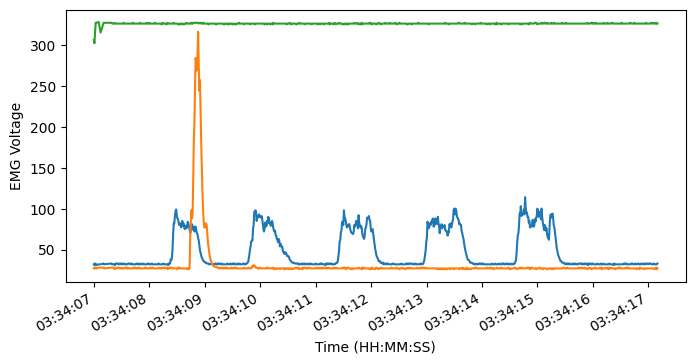

In [177]:
plt.figure(figsize=(8,4))
plt.plot(emg_data_selected['values_datetime'], emg_data_selected['SensorValueA0'])
plt.plot(emg_data_selected['values_datetime'], emg_data_selected['SensorValueA1'])
plt.plot(emg_data_selected['values_datetime'], emg_data_selected['SensorValueA2'])
plt.ylabel('EMG Voltage')
plt.xticks((pd.date_range(emg_data_selected['values_datetime'].iloc[0], emg_data_selected['values_datetime'].iloc[-1], freq='1s')), 
           (pd.date_range(emg_data_selected['values_datetime'].iloc[0], emg_data_selected['values_datetime'].iloc[-1], freq='1s')).strftime('%H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.xlabel('Time (HH:MM:SS)')
plt.show()

In [153]:
post_threshold_crossings = np.diff(emg_data_selected['SensorValueA0'] > 50, prepend=False)
pre_threshold_crossings = np.diff(emg_data_selected['SensorValueA0'] > 50, append=False)

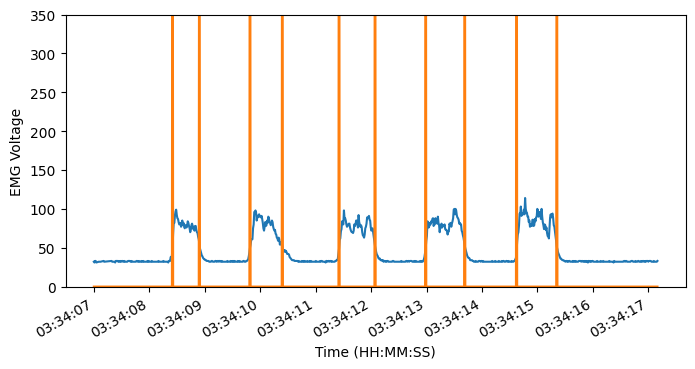

In [184]:
plt.figure(figsize=(8,4))
plt.plot(emg_data_selected['values_datetime'], emg_data_selected['SensorValueA0'])
plt.plot(emg_data_selected['values_datetime'], 1000*pre_threshold_crossings)
plt.ylabel('EMG Voltage')
plt.xticks((pd.date_range(emg_data_selected['values_datetime'].iloc[0], emg_data_selected['values_datetime'].iloc[-1], freq='1s')), 
           (pd.date_range(emg_data_selected['values_datetime'].iloc[0], emg_data_selected['values_datetime'].iloc[-1], freq='1s')).strftime('%H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.xlabel('Time (HH:MM:SS)')
plt.ylim(0, 350)
plt.show()

In [180]:
cross_timestamps = emg_data_selected['values_time'][pre_threshold_crossings].values
event_data = cross_timestamps.reshape(len(cross_timestamps)//2,2)
event_df = pd.DataFrame(event_data, columns=['start_time (HH:MM:SS.f)', 'end_time (HH:MM:SS.f)'])
event_df.insert(0, 'date', np.array([file_dt.date()]*event_data.shape[0]))
event_df

,date,start_time (HH:MM:SS.f),end_time (HH:MM:SS.f)
0,2024-05-31,03:34:08.602000,03:34:09.086000
1,2024-05-31,03:34:09.999000,03:34:10.582000
2,2024-05-31,03:34:11.605000,03:34:12.254000
3,2024-05-31,03:34:13.167000,03:34:13.871000
4,2024-05-31,03:34:14.806000,03:34:15.532000


In [189]:
event_df.to_csv(f'../data/{filetag}.csv')